<a href="https://colab.research.google.com/github/nupurrana451/Machine-Learning-Projects/blob/main/HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Workflow:


1.   Importing Data
2.   EDA
3. Data Preprocessing
4. Train Test Split
5. Model evaluation

# **Importing libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Importing dataset

In [3]:
heart_df=pd.read_csv('/content/heart_disease_data.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Exploratory Data Analysis

In [4]:
heart_df.shape

(303, 14)

In [8]:
heart_df.info()
#no null or missing data
heart_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: >

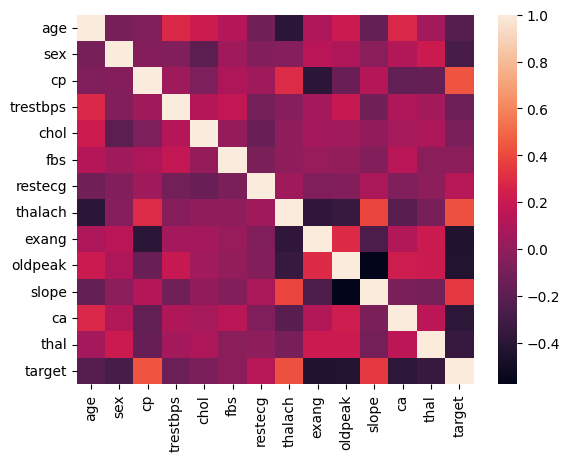

In [7]:
sns.heatmap(heart_df.corr())

Filter for significant positive correlations

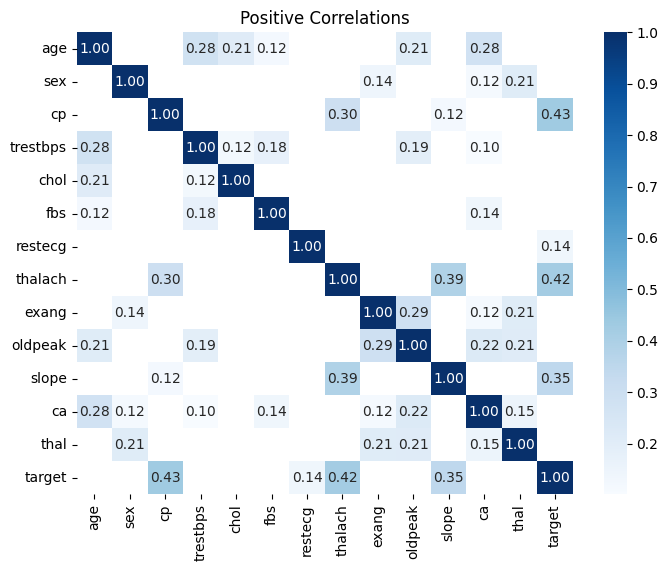

In [20]:
positive_corr = heart_df.corr()
positive_corr = positive_corr[positive_corr > 0.1]
plt.figure(figsize=(8,6))
sns.heatmap(positive_corr, annot=True, cmap='Blues', fmt=".2f")
plt.title('Positive Correlations')
plt.show()

Filter for negative correlations

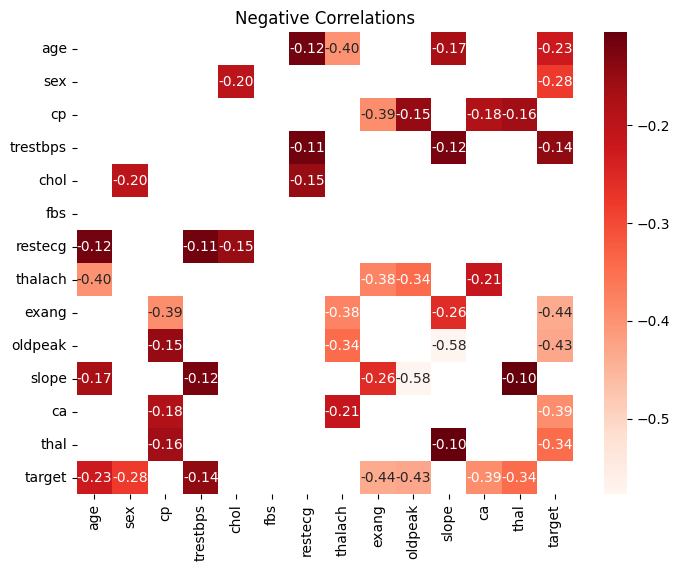

In [19]:
negative_corr = heart_df.corr()
negative_corr = negative_corr[negative_corr < -0.1]
plt.figure(figsize=(8, 6))
sns.heatmap(negative_corr, annot=True, cmap='Reds', fmt=".2f")
plt.title('Negative Correlations')
plt.show()

The heatmaps show a strong positive correlation between chest pain and incidence of heart disease. As maximum heart rate (thallach) increases, presence of heart disease increases. Same goes with slope.
However, females have a lesser tendency for heart disease. Exang, old peak, thallium stress results(thal), and number of major vessels(ca) are all negatively correlated with incidence of heart disease.

<Axes: xlabel='target', ylabel='count'>

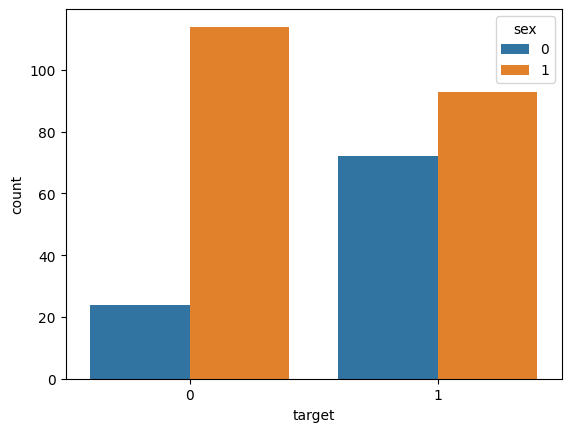

In [22]:
sns.countplot(x='target', data=heart_df, hue='sex')

<Axes: xlabel='sex', ylabel='count'>

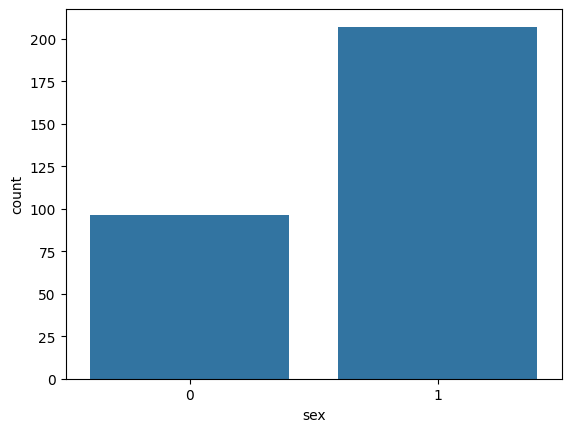

In [24]:
sns.countplot(x='sex',data=heart_df)

The number of females is significantly less than number of males. Males have a higher  rate of defective heart.

<Axes: xlabel='target', ylabel='count'>

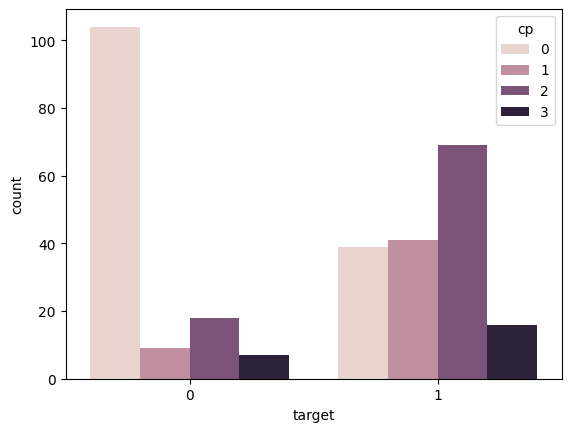

In [26]:
sns.countplot(x='target', data=heart_df, hue='cp')

<Axes: xlabel='cp', ylabel='count'>

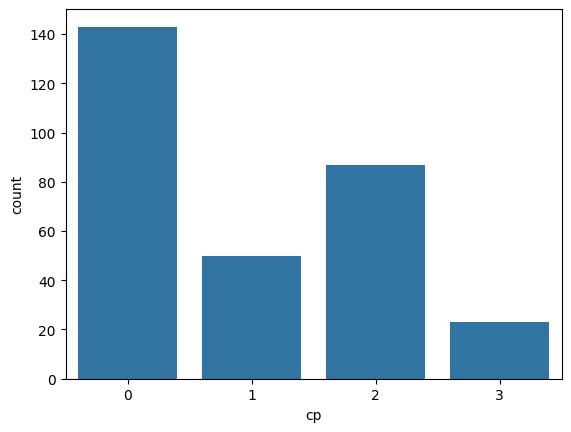

In [27]:
sns.countplot(x='cp',data=heart_df)

This shows people with higher level of chest pain had a higher occurrence of heart disease. However, it's interesting to note that a significant amount of people without any chest pain still had heart disease.

# Train Test Split

In [28]:
X=heart_df.drop(columns='target',axis=1)
Y=heart_df['target']

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [34]:
X_train.shape
X_test.shape
Y_test.shape
Y_train.shape

(242,)

In [35]:
model=LogisticRegression()

In [36]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model Evaluation

In [37]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.8512396694214877


In [38]:
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Accuracy on training data:',test_data_accuracy)

Accuracy on training data: 0.819672131147541


# Prediction System

In [44]:
input_d=(43,1,0,120,177,0,0,120,1,2.5,1,0,3)
dasarray=np.asarray(input_d)
prediction=model.predict(dasarray.reshape(1,-1))
print(prediction)
if (prediction[0]==0):
  print('The person does not have heart disease')
else:
  print('The person has heart disease')

[0]
The person does not have heart disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
